In [7]:
import sys
sys.path.append('Scripts')

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, utils, datasets, models
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils import path
from utils import createInputFigure

from sklearn import preprocessing
import os
import time
import copy

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
table.to_csv("stats.csv")

In [4]:
dataPath = path('Models')
modelsTitles = os.listdir(dataPath())[3:]
table = pd.DataFrame(index = range(len(modelsTitles)), columns = ['model', 'best val acc', 'best val loss', 'training acc', 'training loss'])

for model, k in zip(modelsTitles, list(range(len(modelsTitles)))):
                    
    Path = path(dataPath/model)
    Training, Validation = torch.load(Path/'stats512.pth')['512']
    
    for i in range(len(Training[0])):
        Training[0][i] = Training[0][i].item()
        Validation[0][i] = Validation[0][i].item()
        
    bestValAccArg = np.argmax(Validation[0])
    
    table.loc[k] = [model, Validation[0][bestValAccArg], Validation[1][bestValAccArg],
                           Training[0][bestValAccArg], Training[1][bestValAccArg]]
                    
table = table.sort_values(by = 'best val acc', ascending = False, ignore_index = True)
table

Directory Models loaded successfully.
Directory Models/densenet161 loaded successfully.
Directory Models/densenet169 loaded successfully.
Directory Models/densenet201 loaded successfully.
Directory Models/googlenet loaded successfully.
Directory Models/mnasnet0_5 loaded successfully.
Directory Models/mnasnet1_0 loaded successfully.
Directory Models/mobilenet loaded successfully.
Directory Models/resnet101 loaded successfully.
Directory Models/resnet101_32x8d loaded successfully.
Directory Models/resnet152 loaded successfully.
Directory Models/resnet18 loaded successfully.
Directory Models/resnet34 loaded successfully.
Directory Models/resnet50 loaded successfully.
Directory Models/resnext50_32x4d loaded successfully.
Directory Models/shufflenet_v2_x0_5 loaded successfully.
Directory Models/vgg11 loaded successfully.
Directory Models/vgg13 loaded successfully.
Directory Models/vgg16 loaded successfully.
Directory Models/vgg19 loaded successfully.


,model,best val acc,best val loss,training acc,training loss
0,resnet34,0.490385,2.13182,0.960526,0.183534
1,resnet101_32x8d,0.471154,2.03539,0.95933,0.157079
2,densenet169,0.466346,1.9464,0.899522,0.387298
3,resnext50_32x4d,0.461538,1.85677,0.777512,0.643034
4,googlenet,0.456731,1.594,0.771531,0.691261
5,resnet18,0.456731,2.18356,0.931818,0.213244
6,mobilenet,0.451923,1.84646,0.892344,0.375436
7,densenet161,0.447115,1.95333,0.90311,0.339584
8,resnet50,0.447115,2.08339,0.913876,0.295867
9,resnet152,0.447115,2.03128,0.91866,0.287049


In [5]:
dataPath = path('Models\\resnet34')
Training, Validation = torch.load(dataPath/'stats512.pth')['512']

for i in range(len(Training[0])):
    Training[0][i] = Training[0][i].item()
    Validation[0][i] = Validation[0][i].item()
    
for i in [0, 1]:
    Training[i] = Training[i][:10]
    Validation[i] = Validation[i][:10]

Directory Models\resnet34 loaded successfully.


In [12]:
torch.load(dataPath/'stats512.pth')['512']

[[[tensor(0.2141, device='cuda:0', dtype=torch.float64),
   tensor(0.2464, device='cuda:0', dtype=torch.float64),
   tensor(0.3337, device='cuda:0', dtype=torch.float64),
   tensor(0.4294, device='cuda:0', dtype=torch.float64),
   tensor(0.4689, device='cuda:0', dtype=torch.float64),
   tensor(0.5586, device='cuda:0', dtype=torch.float64),
   tensor(0.5909, device='cuda:0', dtype=torch.float64),
   tensor(0.7823, device='cuda:0', dtype=torch.float64),
   tensor(0.8660, device='cuda:0', dtype=torch.float64),
   tensor(0.8959, device='cuda:0', dtype=torch.float64),
   tensor(0.9139, device='cuda:0', dtype=torch.float64),
   tensor(0.9246, device='cuda:0', dtype=torch.float64),
   tensor(0.9342, device='cuda:0', dtype=torch.float64),
   tensor(0.9605, device='cuda:0', dtype=torch.float64),
   tensor(0.9342, device='cuda:0', dtype=torch.float64)],
  [2.008943215796822,
   1.778452232123562,
   1.695092449062749,
   1.5046700917932976,
   1.4252638071062462,
   1.216274263613532,
   1.11117

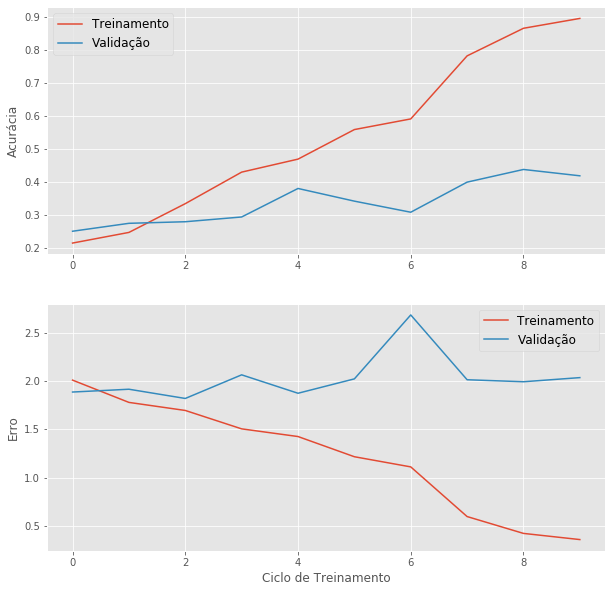

In [24]:
plt.style.use('ggplot')
fig, axs = plt.subplots(nrows = 2, ncols = 1)

fig.set_size_inches(10, 10)
fig.subplots_adjust(hspace = 0.2)
size = len(Training[0])

axs[0].plot(range(size), Training[0], label = 'Treinamento'); axs[1].plot(range(size), Training[1], label = 'Treinamento')
axs[0].plot(range(size), Validation[0], label = 'Validação'); axs[1].plot(range(size), Validation[1], label = 'Validação')

axs[1].set(xlabel = 'Ciclo de Treinamento')
axs[0].set(ylabel = 'Acurácia')
axs[1].set(ylabel = 'Erro')
axs[0].legend(fontsize = 12)
axs[1].legend(fontsize = 12)

fig.savefig('figure.png')